In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


596

## Perform API Calls

In [3]:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b41ab2ab34731c374f6d1842b77875c2'

In [4]:
cities_pd=pd.DataFrame(cities)
cities_pd["City"]=cities[0:]
del cities_pd[0]
cities_pd["Country"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Humidity"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Date"] = ""


cities_pd.head()


,City,Country,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed,Date
0,makakilo city,,,,,,,,
1,ribeira grande,,,,,,,,
2,maceio,,,,,,,,
3,bengkulu,,,,,,,,
4,barentsburg,,,,,,,,


In [5]:

params = {
    "q": "city"
}
response = requests.get(url, params=params).json()


# use iterrows to iterate through pandas dataframe
for index, row in cities_pd.iterrows():
    time.sleep(2)
    # get city from df
    city = row['City']

    # add keyword to params dict
    params['q'] = city

    # assemble url and make API request
#     print(f"Retrieving Results for Index {index}: {city}.")
    response = requests.get(url, params=params).json()
#     print(response['coord'])
    # extract results   
    try:
        cities_pd.loc[index, 'Country'] = response['sys']['country']
        cities_pd.loc[index, 'Lat'] = response['coord']['lat']
        cities_pd.loc[index, 'Lng'] = response['coord']['lon']
        cities_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_pd.loc[index, 'Humidity'] = response['main']['humidity']
        cities_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_pd.loc[index, 'Min Temp'] = response['main']['temp_min']
        cities_pd.loc[index, 'Date'] = response['dt']
        cities_pd.loc[index, 'Wind Speed'] = response['wind']['speed']
    except(KeyError, IndexError):
        print("Missing field... skipping.")
    
    


        

Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
Missing field... skipping.
M

In [6]:

cities_pd.head()


,City,Country,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed,Date,Min Temp
0,makakilo city,,,,,,,,,NaN
1,ribeira grande,,,,,,,,,NaN
2,maceio,,,,,,,,,NaN
3,bengkulu,,,,,,,,,NaN
4,barentsburg,,,,,,,,,NaN


In [7]:

cities_pd = cities_pd.dropna(how='any')
cities_pd.to_csv("Weather_Output.csv")
cities_pd.count()

City          469
Country       469
Lat           469
Lng           469
Cloudiness    469
Humidity      469
Max Temp      469
Wind Speed    469
Date          469
Min Temp      469
dtype: int64

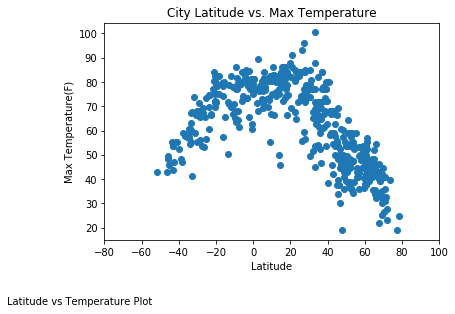

In [8]:
plt.scatter(cities_pd["Lat"],cities_pd["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.xlim(-80,100)
plt.figtext(-0.1, -0.1, "Latitude vs Temperature Plot")

plt.show()

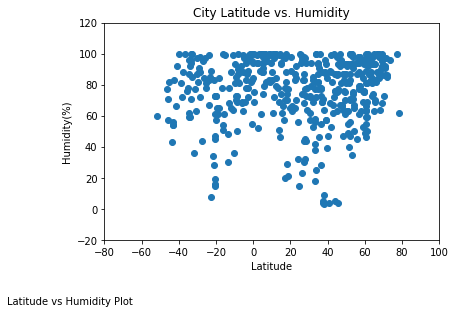

In [9]:
plt.scatter(cities_pd["Lat"],cities_pd["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.figtext(-0.1, -0.1, "Latitude vs Humidity Plot")
plt.show()

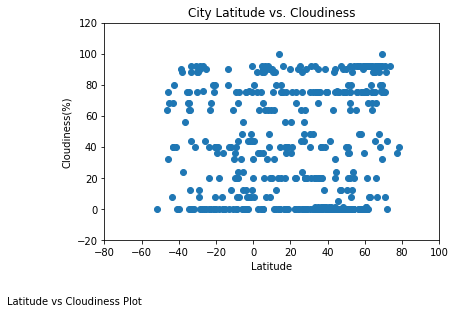

In [10]:
plt.scatter(cities_pd["Lat"],cities_pd["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.figtext(-0.1, -0.1, "Latitude vs Cloudiness Plot")
plt.show()

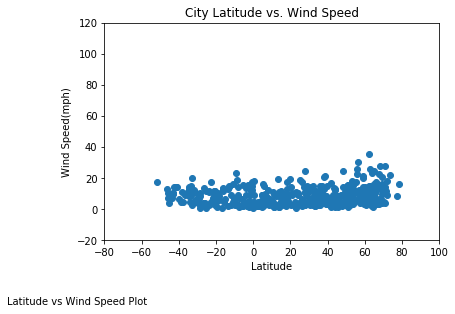

In [11]:
plt.scatter(cities_pd["Lat"],cities_pd["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.figtext(-0.1, -0.1, "Latitude vs Wind Speed Plot")
plt.show()